In [4]:
# PCA Pricipal Component Analysis is a dimensionally reduction technique.
# It finds the linear combinations of the features that explain the most variance in the data.

from sklearn.cluster import KMeans
import sklearn.datasets
import matplotlib.pyplot as plt

dataset = sklearn.datasets.load_iris(as_frame=True)

X = (dataset['data']
     .loc[:, ['sepal length (cm)', 'sepal width (cm)']]
)
y = dataset['target']

In [5]:
X

,sepal length (cm),sepal width (cm)
0,5.1,3.5
1,4.9,3.0
2,4.7,3.2
3,4.6,3.1
4,5.0,3.6
...,...,...
145,6.7,3.0
146,6.3,2.5
147,6.5,3.0
148,6.2,3.4


Text(0.5, 1.0, 'PCA on Iris data')

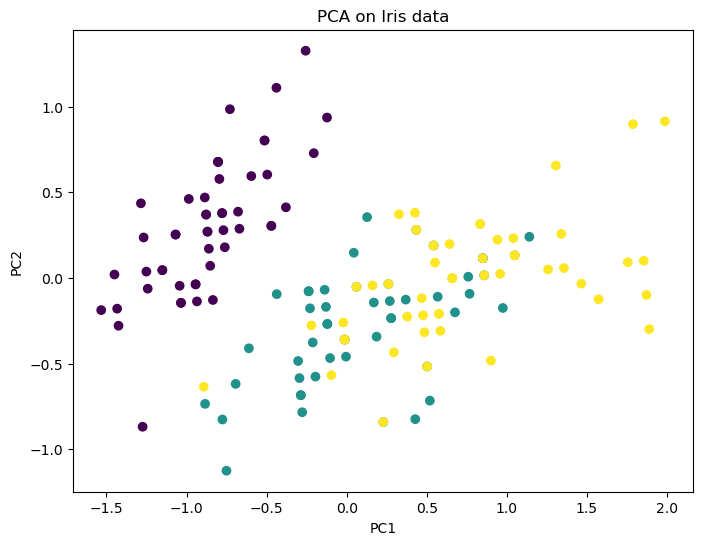

In [6]:
# run PCA on the first two components of the Iris dataset
from sklearn.decomposition import PCA
pca = PCA(n_components=2)
pca.fit(X)
X_pca = pca.transform(X)

fig, ax = plt.subplots(figsize=(8, 6))
ax.scatter(X_pca[:,0], X_pca[:,1], c=y, cmap='viridis')
ax.set_xlabel('PC1')
ax.set_ylabel('PC2')
ax.set_title('PCA on Iris data')

Text(0.5, 1.0, 'PCA on Iris data')

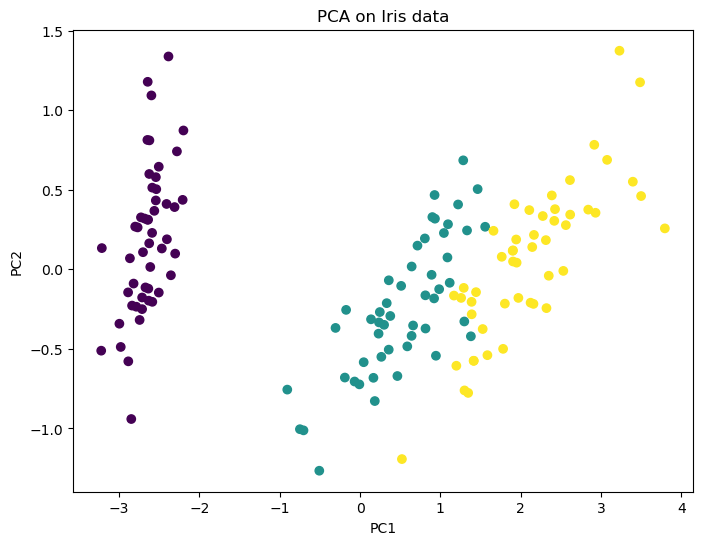

In [7]:
# run PCA on all of the Iris dataset

pca = PCA()
X_all = dataset['data']
pca.fit(X_all)
X_pca = pca.transform(X_all)

fig, ax = plt.subplots(figsize=(8, 6))
ax.scatter(X_pca[:,0], X_pca[:,1], c=y, cmap='viridis')
ax.set_xlabel('PC1')
ax.set_ylabel('PC2')
ax.set_title('PCA on Iris data')

In [8]:
# components of PCA

# pricipal component (PC): the linear combination of the features
# explained variance ratio: how much variance is explained by each PC
# feature weights: how much each feature contributes to each PC.

In [9]:
# tell sklearn to output pandas dataframes
sklearn.set_config(transform_output='pandas')
pca.transform(X_all)

,pca0,pca1,pca2,pca3
0,-2.684126,0.319397,-0.027915,0.002262
1,-2.714142,-0.177001,-0.210464,0.099027
2,-2.888991,-0.144949,0.017900,0.019968
3,-2.745343,-0.318299,0.031559,-0.075576
4,-2.728717,0.326755,0.090079,-0.061259
...,...,...,...,...
145,1.944110,0.187532,0.177825,0.426196
146,1.527167,-0.375317,-0.121898,0.254367
147,1.764346,0.078859,0.130482,0.137001
148,1.900942,0.116628,0.723252,0.044595


In [10]:
# rename column names from pcaX to PCX

def rename_pc0_toPC1(col):
    num = int(col[3:]) + 1
    return 'PC' + str(num)

pca.transform(X_all).rename(columns=rename_pc0_toPC1)

,PC1,PC2,PC3,PC4
0,-2.684126,0.319397,-0.027915,0.002262
1,-2.714142,-0.177001,-0.210464,0.099027
2,-2.888991,-0.144949,0.017900,0.019968
3,-2.745343,-0.318299,0.031559,-0.075576
4,-2.728717,0.326755,0.090079,-0.061259
...,...,...,...,...
145,1.944110,0.187532,0.177825,0.426196
146,1.527167,-0.375317,-0.121898,0.254367
147,1.764346,0.078859,0.130482,0.137001
148,1.900942,0.116628,0.723252,0.044595


Text(0.5, 1.0, 'Scree Plot')

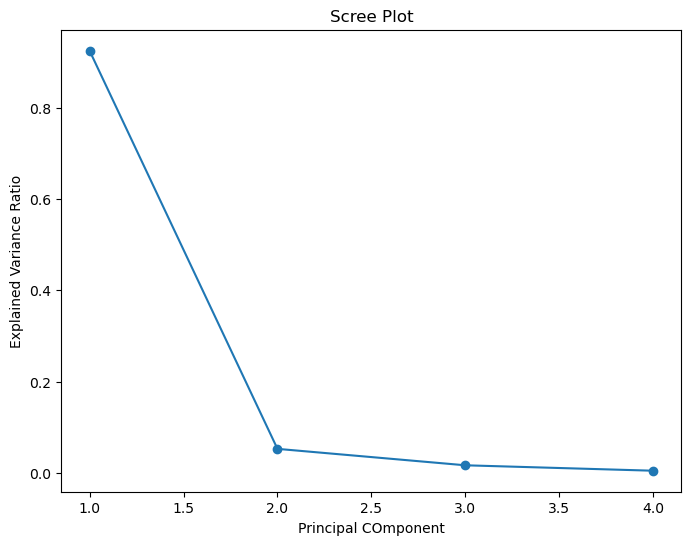

In [11]:
# scree plot the explained variance
fig, ax = plt.subplots(figsize=(8, 6))
ax.plot(range(1, len(pca.explained_variance_ratio_)+1), pca.explained_variance_ratio_, marker='o')
ax.set_xlabel('Principal COmponent')
ax.set_ylabel('Explained Variance Ratio')
ax.set_title('Scree Plot')

In [12]:
# The explained variance ratio is the percentage of variance explained by each of the selected components.
# The first pricipal component explains 92.5% of the variance in the data
# The second pricipal component explains 5.3% of the variance in the data

pca.explained_variance_ratio_

array([0.92461872, 0.05306648, 0.01710261, 0.00521218])

In [13]:
pca.explained_variance_ratio_.cumsum()

array([0.92461872, 0.97768521, 0.99478782, 1.        ])

## Weights

For every pricipal component, we get a set of weights for each feature.  
The weight tells us how much each feature contributes to the PC.  

In [14]:
# convert component to a dataframe
import pandas as pd

components = pd.DataFrame(pca.components_, columns=X_all.columns, index=['PC1', 'PC2', 'PC3', 'PC4'])
components

,sepal length (cm),sepal width (cm),petal length (cm),petal width (cm)
PC1,0.361387,-0.084523,0.856671,0.358289
PC2,0.656589,0.730161,-0.173373,-0.075481
PC3,-0.582030,0.597911,0.076236,0.545831
PC4,0.315487,-0.319723,-0.479839,0.753657


In [15]:
# centered data - for next cell's calculation
X_all - X_all.mean()

,sepal length (cm),sepal width (cm),petal length (cm),petal width (cm)
0,-0.743333,0.442667,-2.358,-0.999333
1,-0.943333,-0.057333,-2.358,-0.999333
2,-1.143333,0.142667,-2.458,-0.999333
3,-1.243333,0.042667,-2.258,-0.999333
4,-0.843333,0.542667,-2.358,-0.999333
...,...,...,...,...
145,0.856667,-0.057333,1.442,1.100667
146,0.456667,-0.557333,1.242,0.700667
147,0.656667,-0.057333,1.442,0.800667
148,0.356667,0.342667,1.642,1.100667


In [16]:
# calculate PC1 by hand for the first row - linear combination of centered variables and the first component

# ((X_all - X_all.mean()).iloc[0] * components.iloc[0]).sum()
# -2.6841256259695347

-.743333 * .361387 + .442667 * -.084523 + -2.358 * .856671 + -.999333 * .358289
# -2.6841266649490003

-2.6841266649490003

In [18]:
pca.transform(X_all).rename(columns=rename_pc0_toPC1).iloc[0].iloc[0]
# -2.6841256259695347

np.float64(-2.6841256259695347)

In [19]:
# manually calculate PCA with numpy
import numpy as np
nums = X_all - X_all.mean()
vals, vecs = np.linalg.eig(nums.cov())
idxs = pd.Series(vals).argsort()
explained_variance = pd.Series(sorted(vals, reverse=True))

comps = (pd.DataFrame(vecs, index=nums.columns)
 .iloc[:, idxs[::-1]]
)

pcas = (nums.dot(comps))
pcas.columns = ['PC1', 'PC2', 'PC3', 'PC4']
pcas

,PC1,PC2,PC3,PC4
0,-2.684126,-0.319397,-0.027915,0.002262
1,-2.714142,0.177001,-0.210464,0.099027
2,-2.888991,0.144949,0.017900,0.019968
3,-2.745343,0.318299,0.031559,-0.075576
4,-2.728717,-0.326755,0.090079,-0.061259
...,...,...,...,...
145,1.944110,-0.187532,0.177825,0.426196
146,1.527167,0.375317,-0.121898,0.254367
147,1.764346,-0.078859,0.130482,0.137001
148,1.900942,-0.116628,0.723252,0.044595


In [20]:
import plotly.express as px
fig = px.scatter_3d(pcas, x='PC1', y='PC2', z='PC3', color=y)
fig.show()


## Other dimensionality Reduction Techniques

* t-SNE (t-distributed stochastic neighbor embedding) tries to preserve the local structure of the data
* UMAP (Uniform Manifold Approximation and Projection) tries to preserve both global and local structure of the data
* Autoencoders

In [21]:
# run t-SNE on the Iris dataset

from sklearn.manifold import TSNE
tsne = TSNE(n_components=3, random_state=42)
X_tsne = tsne.fit_transform(X_all)

X_tsne

,tsne0,tsne1,tsne2
0,-17.253496,17.065207,9.976707
1,-11.937507,58.597488,-31.507671
2,-42.262386,37.544769,-45.571026
3,-23.968325,38.079189,-37.944496
4,-41.801540,17.332102,7.505445
...,...,...,...
145,64.324219,13.242468,1.138676
146,50.273670,-36.346104,-13.635204
147,50.463417,-0.928793,-2.966825
148,78.784599,7.576165,-30.470518


In [22]:
import plotly.express as px
fig = px.scatter_3d(X_tsne, x='tsne0', y='tsne1', z='tsne2', color=y)
fig.show()

In [ ]:
!pip uninstall umap

In [ ]:
# https://umap-learn.readthedocs.io/en/latest/basic_usage.html
import umap
reducer = umap.UMAP(n_components=3, random_state=42)
X_umap = pd.DataFrame(reducer.fit_transform(X_all), columns=['umap0', 'umap1', 'umap2'])
X_umap

AttributeError: module 'umap' has no attribute 'UMAP'

In [ ]:
import plotly.express as px
fig = px.scatter_3d(X_umap, x='umap0', y='umap1', z='umap2', color=y)
fig.show()

In [27]:
import pandas as pd
raw = pd.read_csv('titanic.csv')
data = raw.loc[:, ['Survived', 'Pclass', 'Age', 'SibSp', 'Parch', 'Fare']].dropna()
data

,Survived,Pclass,Age,SibSp,Parch,Fare
0,0,3,22.0,1,0,7.2500
1,1,1,38.0,1,0,71.2833
2,1,3,26.0,0,0,7.9250
3,1,1,35.0,1,0,53.1000
4,0,3,35.0,0,0,8.0500
...,...,...,...,...,...,...
885,0,3,39.0,0,5,29.1250
886,0,2,27.0,0,0,13.0000
887,1,1,19.0,0,0,30.0000
889,1,1,26.0,0,0,30.0000


In [40]:
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()
sklearn.set_config(transform_output='pandas')
X = scaler.fit_transform(data.drop(columns='Survived'))

In [41]:
X

,Pclass,Age,SibSp,Parch,Fare
0,0.911232,-0.530377,0.524570,-0.505895,-0.518978
1,-1.476364,0.571831,0.524570,-0.505895,0.691897
2,0.911232,-0.254825,-0.551703,-0.505895,-0.506214
3,-1.476364,0.365167,0.524570,-0.505895,0.348049
4,0.911232,0.365167,-0.551703,-0.505895,-0.503850
...,...,...,...,...,...
885,0.911232,0.640719,-0.551703,5.357890,-0.105320
886,-0.282566,-0.185937,-0.551703,-0.505895,-0.410245
887,-1.476364,-0.737041,-0.551703,-0.505895,-0.088774
889,-1.476364,-0.254825,-0.551703,-0.505895,-0.088774


In [42]:
# run PCA on the data
pca = PCA()
X_pca = pca.fit_transform(X)
X_pca

,pca0,pca1,pca2,pca3,pca4
0,1.133045,-0.420339,-0.376889,0.488197,0.266886
1,-1.460888,0.654999,-0.433426,0.794996,-0.365200
2,0.641975,-1.048999,-0.164703,-0.252892,0.328977
3,-1.203606,0.514642,-0.459494,0.796029,-0.637901
4,0.302516,-1.170015,0.248261,-0.022860,0.505227
...,...,...,...,...,...
885,1.191582,2.286957,4.103414,-2.600926,-0.102219
886,-0.177698,-0.684585,-0.349049,-0.163418,-0.440737
887,-0.753644,-0.079133,-1.020477,-0.355592,-1.244590
889,-1.016896,-0.174225,-0.698685,-0.176262,-1.108653


In [43]:
# plot the first 3 columns in plotly
import plotly.express as px

fig = px.scatter_3d(X_pca, x='pca0', y='pca1', z='pca2', color=raw.loc[X_pca.index]['Survived'])
fig.show()

0      0
1      1
2      1
3      1
4      0
      ..
885    0
886    0
887    1
889    1
890    0
Name: Survived, Length: 714, dtype: int64